# Part 2: Visualizing Uncertainty

---

As before, let's clear our workspace. In Jupyter we do this be restarting our kernel to clear are variables. In your notebook, press the buttons `Restart Kernel` and `Clear All Outputs`.

In [1]:
# Set the working directory (adapt the path to your directory)
import os
os.chdir("C:/Users/wachb/OneDrive - UvA/CSSci/Stats/revision/Notebooks/notebooks") # put the data files in the same folder!

## Importing Data

---

In [2]:
import pandas as pd  # always remember to import the right packagas
dat2 = pd.read_csv("QoG2012.csv")

For this session, we are interested in the variable `former_col`, which indicates a former colony (1) or not (0). And in the variable `wdi_gdpc`, which indicates GDP Per Capita from world development indicators.

We will use these two variables to answer the question whether former colonialization and wealth are related. More specifically, we want to test if formerly colonized countries are less wealthy (at the time of data collection) than non-colonized countries.

Lets start by looking at some example GDPs, to get a sense of our dataset:

In [3]:
dat2.head()

,h_j,wdi_gdpc,undp_hdi,wbgi_cce,wbgi_pse,former_col,lp_lat_abst
0,0.0,628.407410,NaN,-1.545358,-1.934384,0,0.366667
1,0.0,4954.198242,0.781,-0.853812,-0.602608,0,0.455556
2,0.0,6349.720703,0.704,-0.730151,-1.733624,1,0.311111
3,NaN,NaN,NaN,1.326734,1.198044,0,0.470000
4,0.0,2856.751709,0.381,-1.206574,-1.415094,1,0.136667


To highlight countries that were a former colony, we can use:

In [4]:
dat2[dat2['former_col']==1].head()  # note the column former_col below

,h_j,wdi_gdpc,undp_hdi,wbgi_cce,wbgi_pse,former_col,lp_lat_abst
2,0.0,6349.720703,0.704,-0.730151,-1.733624,1,0.311111
4,0.0,2856.751709,0.381,-1.206574,-1.415094,1,0.136667
5,NaN,13981.979492,0.800,0.862437,0.708405,1,0.189222
7,0.0,8584.885742,0.853,-0.726461,-1.036121,1,0.377778
10,NaN,NaN,0.815,1.439611,0.868442,1,0.268333


Of course, we cannot draw conclusions from a couple of example data entries. To say anything meaningful, some visuals are useful. As a baseline, we want these visuals to show mean (i.e. average) GDP of formerly colonized countries vs non-colonized countries.

Let's give this a try ...

In [5]:
# Lets first extract the wdi_gdpc variable:
gdp_per_country = dat2['wdi_gdpc']
gdp_col = gdp_per_country[dat2['former_col']==1] # gdp of colonized countries
gdp_not_col = gdp_per_country[dat2['former_col']==0]

In [6]:
# We now use this variable to obtain means:
import numpy as np
mean_gdp_col = np.mean(gdp_col)
mean_gdp_not_col = np.mean(gdp_not_col)

print(f'Mean GDP: \nFormerly colonized: {mean_gdp_col}, \nNot colonized: {mean_gdp_not_col}')

Mean GDP: 
Formerly colonized: 6599.71420976757, 
Not colonized: 16415.39229736328


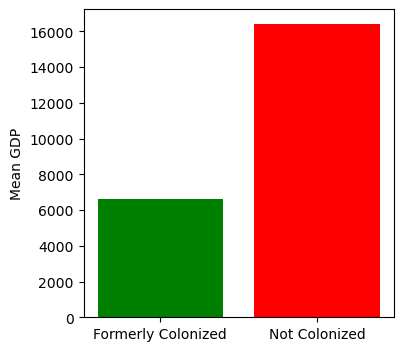

In [7]:
# Then plot the stored means as a barchart:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.bar(
    [1, 2], 
    [mean_gdp_col, mean_gdp_not_col],
    color=['green', 'red']
)
plt.xticks([1, 2], ['Formerly Colonized', 'Not Colonized']) # x-axis labels
plt.ylabel('Mean GDP')
plt.show()

We can immediately see a whopping difference. 

Very depressing... 

It is important to validate that these results were not due to poor data or that the differences emerged by chance. To understand uncertainty a bit better, we can use confidence intervals. Confidence intervals tell us with 95% confidence that our estimates lay in-between two values.

### Some Mathematical Concepts

---

Before we can derive a confidence interval, we need to cover some underlying mathematical concepts.

We let $X$ be our population of interest. In particular, this means that $X$ contains every country of the world.

Then, we let the values $x_1, x_2, ..., x_n$ be independent samples taken from $X$, where $n$ equals the total number of samples in our dataset. 

In particular, these values are all the GDPs that are present in our dataset.

We define our sample's mean (i.e. estimated mean gdp) as: $$\bar{x} = {x_1, ..., x_n \over n}$$

And our sample's variance as: $$\sigma^2= {\sum^{n}_{i=1}(x_i-\bar{x})^2 \over n-1} $$

Using this definition of the variance, we can now define our sample's standard deviation: $$\sigma = \sqrt{\sigma^2}$$

We can now obtain our standard error: $$SE = {\sigma \over \sqrt{n}}$$

Finally, we can define a 95% confidence interval of a mean as: $$\bar{x} \pm 1.96 * SE $$

Note, the 1.96 originates from the normal distribution.

### Math in Python

---

Depending on your background, all this math might be a little intimidating. Luckily, you will probably never use these formulas. However, make sure you have a grasp of them, because as a researcher you should always know what you are doing.

To give you a more practical perspective though, let's return to our dataset and use Python to define find these terms for us:

In [8]:
# Means (see above): type your answer here.

In [9]:
# Variance: type your answer here.

In [10]:
# Standard deviation: type your answer here.

In [11]:
# Standard errors: (note that without standard deviation this code doesn't work!)
se_gdp_col = std_gdp_col / np.sqrt(len(gdp_col))
se_gdp_not_col = std_gdp_not_col / np.sqrt(len(gdp_not_col))
print(se_gdp_col, se_gdp_not_col)

NameError: name 'std_gdp_col' is not defined

Now then, all of this was necessary to say something about the errors in our dataset. To be scientific, we should always include error bars in barcharts. Error bars rely on the properties of standard error and tell us whether we are 95% of the times confident that our mean estimates lay between the lower and upper bound values. 

The interpretation of confidence is hard and nuanced. But as a general rule of thumb: if two estimates have large and overlapping confidence intervals, then we should assume that the two estimates can **not** be distinguished from each-other based on our data.

Let's visualize this in our barchart from before:

In [12]:
# 95% confidence intervals are defined by +/- 1.96*SE (note that without standard error this code doesn't work!)
ci_col = 1.96 * se_gdp_col
ci_not_col = 1.96 * se_gdp_not_col

NameError: name 'se_gdp_col' is not defined

In [13]:
print('With 95% confidence, our mean GDPs lay between ...') #(idem)
print(f'{[mean_gdp_col - ci_col, mean_gdp_col + ci_col]} for formerly colonized countries')
print(f'{[mean_gdp_not_col - ci_not_col, mean_gdp_not_col + ci_not_col]} for non-colonized countries')

With 95% confidence, our mean GDPs lay between ...


NameError: name 'ci_col' is not defined

NameError: name 'ci_col' is not defined

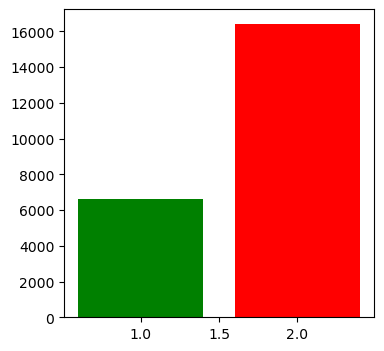

In [15]:
# Visually, we can map this onto our barchart from before: #(idem)
plt.figure(figsize=(4, 4))
plt.bar(
    [1, 2], 
    [mean_gdp_col, mean_gdp_not_col],
    color=['green', 'red']
)
plt.errorbar(
    [1, 2],  # error bar locations on x-axis 
    [mean_gdp_col, mean_gdp_not_col],  # error bar center on y-axis
    yerr=[ci_col, ci_not_col],  # the plus-minus values of 95%CI 
    fmt='o',  # shape of the center 
    capsize=4, color='black')
plt.title("Means with 95% CI")
plt.xticks([1, 2], ['Formerly Colonized', 'Not Colonized']) # x-axis labels
plt.ylabel('GDP Per Capita')
plt.show()

What can we conclude from this graph?